In [188]:
import requests
import json
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import statsmodels.api as sm  
import matplotlib.pyplot as plt

In [3]:
## data scraping 
data = {}
years = [str(_) for _ in list(range(2005, 2020))]
arr = np.zeros((len(states), len(years)))
for yr in range(len(years)):
    y = years[yr]
    for i in range(len(states)):
        r = requests.get('https://www.nationsreportcard.gov/DataService/GetAdhocData.aspx',
                params = {'type': 'data',
                        'subject': 'reading',
                          'subscale': 'RRPCM',
                         'grade': 8,
                         'jurisdiction': states[i],
                         'Year': y,
                         'variable': 'TOTAL',
                         'stattype':'PC:P9'})
        p = r.text.replace("\\", "")
        j = json.loads(p, strict = False)
        try:
            arr[i][yr] = j['result'][0]['value']
        except:
            print(states[i], y)

In [1]:
### data scraping 
# data = {}
# years = [str(_) for _ in list(range(2005, 2020))]
# arr = np.zeros((len(states), len(years)))
# for yr in range(len(years)):
#     y = years[yr]
#     for i in range(len(states)):
#         r = requests.get('https://www.nationsreportcard.gov/DataService/GetAdhocData.aspx',
#                 params = {'type': 'data',
#                         'subject': 'mathematics',
#                           'subscale': 'MRPCM',
#                          'grade': 8,
#                          'jurisdiction': states[i],
#                          'Year': y,
#                          'variable': 'TOTAL',
#                          'stattype':'PC:P9'})
#         p = r.text.replace("\\", "")
#         j = json.loads(p, strict = False)
#         try:
#             arr[i][yr] = j['result'][0]['value']
#             data[(i, yr)] = j['result'][0]['value']
#         except:
#             print(states[i], y)

In [117]:
df = pd.read_csv('./ocrdata/report (2).csv')
df['State'] = df['School State']

In [121]:
y = df[df['Year'] == 2017]

In [122]:
y

,Lea State,LEA,School State,School,ID,Year,Category,Sex,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),SWD (Section 504 only),LEP,State
340,AK,Lower Yukon School District,AK,Alakanuk School,20000300216,2017,Students absent 15 or more school dates during...,M,45.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,11.0,NaN,34.0,AK
341,AK,Lower Yukon School District,AK,Alakanuk School,20000300216,2017,Students absent 15 or more school dates during...,F,39.0,NaN,NaN,NaN,NaN,NaN,NaN,39.0,2.0,NaN,26.0,AK
342,AK,Lower Yukon School District,AK,Emmonak School,20000300217,2017,Students absent 15 or more school dates during...,M,53.0,NaN,NaN,NaN,NaN,1.0,NaN,54.0,10.0,NaN,34.0,AK
343,AK,Lower Yukon School District,AK,Emmonak School,20000300217,2017,Students absent 15 or more school dates during...,F,60.0,NaN,NaN,NaN,1.0,3.0,NaN,64.0,11.0,NaN,44.0,AK
344,AK,Lower Yukon School District,AK,Marshall School,20000300218,2017,Students absent 15 or more school dates during...,M,36.0,NaN,NaN,NaN,NaN,NaN,NaN,36.0,6.0,NaN,28.0,AK
345,AK,Lower Yukon School District,AK,Marshall School,20000300218,2017,Students absent 15 or more school dates during...,F,31.0,NaN,NaN,NaN,NaN,NaN,NaN,31.0,1.0,NaN,24.0,AK
346,AK,Lower Yukon School District,AK,Hooper Bay School,20000300219,2017,Students absent 15 or more school dates during...,M,153.0,NaN,NaN,NaN,NaN,2.0,1.0,156.0,30.0,NaN,124.0,AK
347,AK,Lower Yukon School District,AK,Hooper Bay School,20000300219,2017,Students absent 15 or more school dates during...,F,125.0,NaN,NaN,NaN,NaN,1.0,NaN,126.0,15.0,NaN,105.0,AK
348,AK,Lower Yukon School District,AK,Mountain Village School,20000300220,2017,Students absent 15 or more school dates during...,M,66.0,NaN,NaN,NaN,NaN,NaN,NaN,66.0,15.0,NaN,43.0,AK
349,AK,Lower Yukon School District,AK,Mountain Village School,20000300220,2017,Students absent 15 or more school dates during...,F,55.0,NaN,NaN,NaN,NaN,NaN,NaN,55.0,4.0,NaN,37.0,AK


In [118]:
te = df[df['Category'] == 'Total enrollment']

In [119]:
te = te[te['Year'] == 2017]

In [120]:
te

,Lea State,LEA,School State,School,ID,Year,Category,Sex,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),SWD (Section 504 only),LEP,State


In [16]:
te.columns

Index(['Lea State', 'LEA', 'School State', 'School', 'ID', 'Year', 'Category',
       'Sex', 'American Indian or Alaska Native', 'Asian',
       'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White',
       'Two or more races', 'Total', 'SWD (IDEA-Eligible)',
       'SWD (Section 504 only)', 'LEP', 'State'],
      dtype='object')

In [17]:
te['Total'].sum()

103699.0

In [124]:
# df = pd.read_csv('./ocrdata/report (2).csv').dropna()
# df['State'] = df['School State']
# df['Total'] = df['Total'].astype(str)
# df = df[~df.Total.str.contains('\*')]
# df['Total'] = pd.to_numeric(df['Total'])
# print(i, df['State'][0])
# g = df.groupby(['Year', 'Category', 'State']).agg(sum)['Total'].reset_index()

50 AK


In [80]:
te = pd.read_csv('Enrollment.csv')

In [81]:
te = te[['LEA_STATE', 'TOT_ENR_M', 'TOT_ENR_F']].groupby('LEA_STATE').agg(sum)

In [82]:
te['enr'] = te['TOT_ENR_M'] + te['TOT_ENR_F']

In [111]:
df_list = []
for i in range(1, 51):
    df = pd.read_csv('./ocrdata/report (' + str(i) + ').csv').dropna()
    df['State'] = df['School State']
    df['Total'] = df['Total'].astype(str)
    df = df[~df.Total.str.contains('\*')]
    df['Total'] = pd.to_numeric(df['Total'])
    te = df[df['Category'] == 'Total enrollment']
    print(i, df['State'][0], te['Total'].sum())
    g = df.groupby(['Year', 'Category', 'State']).agg(sum)['Total'].reset_index()
    df_list.append(g)

1 AL 319510.0
2 AK 103699.0
3 AZ 492845.0
4 AR 241035.0
5 CA 437302.0
6 CO 344569.0
7 CT 324937.0
8 DE 80985.0
9 FL 488395.0
10 GA 452717.0
11 HI 94116.0
12 ID 166503.0
13 IL 147718.0
14 IN 434118.0
15 IA 258001.0
16 KS 236308.0
17 KY 302206.0
18 LA 371734.0
19 ME 111864.0
20 MD 413507.0
21 MA 444865.0
22 MI 334563.0
23 MN 271508.0
24 MS 294107.0
25 MO 253831.0
26 MT 64161.0
27 NE 155314.0
28 NV 238412.0
29 NH 108291.0
30 NJ 448817.0
31 NM 185664.0
32 NY 419991.0
33 NC 415454.0
34 ND 166830.0
35 OH 370621.0
36 OK 257674.0
37 OR 324004.0
38 PA 412665.0
39 RI 282873.0
40 SC 394909.0
41 SD 112972.0
42 TN 456157.0
43 TX 502017.0
44 UT 515251.0
45 VT 167772.0
46 VA 445272.0
47 WA 331827.0
48 WV 274756.0
49 WI 273999.0
50 WY 183542.0


In [163]:
b = pd.concat(df_list)
c = b.set_index(['State', 'Category', 'Year'])
d = c.unstack().reset_index()
d.columns = d.columns.droplevel()
d.columns = ['State', 'Category', '2013', '2015', '2017']
# d = d.rename(columns = {'': 'hi', 2013: '2013', 2015: '2015', 2017: '2017'})
d = d.set_index('State')
d = d[d['Category'] != 'Total enrollment'].reset_index()


In [164]:
d = d.melt(id_vars=["State", "Category"], 
        var_name="Year", 
        value_name="Value")

In [154]:
d['control_state'] = d['State'].isin(control_states)
d['t'] = d['Year'].isin(['2017'])
d['interaction'] = d['control_state']*d['t']


In [165]:
x,y,z = d[d['Year'] == '2013'], d[d['Year'] == '2015'], d[d['Year'] == '2017']

In [172]:
# enrollment t-tests
from scipy.stats import ttest_ind

xc, xi = x[x['State'].isin(control_states)].dropna(), x[~x['State'].isin(control_states)].dropna()
yc, yi = y[y['State'].isin(control_states)].dropna(), y[~y['State'].isin(control_states)].dropna()
zc, zi = z[z['State'].isin(control_states)].dropna(), z[~z['State'].isin(control_states)].dropna()

print(ttest_ind(xc['Value'], xi['Value']))
print(ttest_ind(yc['Value'], yi['Value']))
print(ttest_ind(zc['Value'], zi['Value']))

Ttest_indResult(statistic=0.02213633268789793, pvalue=0.9824309717333308)
Ttest_indResult(statistic=-0.47465802255668876, pvalue=0.6371832466292291)
Ttest_indResult(statistic=-1.5196861884624244, pvalue=0.1381140258126701)


In [205]:
zc['Value'].mean(), zi['Value'].mean()

(871.75, 4102.777777777777)

In [159]:
d

,State,Category,Year,Value,control_state,t,interaction
0,AK,Students absent 15 or more school dates during...,2013,11268.0,False,False,False
1,AL,Students absent 15 or more school dates during...,2013,23179.0,False,False,False
2,AR,Students absent 15 or more school dates during...,2013,14300.0,False,False,False
3,AZ,Students absent 15 or more school dates during...,2013,37610.0,False,False,False
4,CA,Students absent 15 or more school dates during...,2013,22088.0,False,False,False
5,CO,Students absent 15 or more school dates during...,2013,25180.0,False,False,False
6,CT,Students absent 15 or more school dates during...,2013,24021.0,False,False,False
7,DE,Students absent 15 or more school dates during...,2013,5469.0,False,False,False
8,FL,Students absent 15 or more school dates during...,2013,39035.0,True,False,False
9,GA,Students absent 15 or more school dates during...,2013,22752.0,False,False,False


In [158]:
model = smf.ols(formula = "Value ~ control_state + t + interaction", data = d).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     26.38
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.05e-13
Time:                        13:56:46   Log-Likelihood:                -1444.6
No. Observations:                 135   AIC:                             2897.
Df Residuals:                     131   BIC:                             2909.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.258e+

In [155]:
control_states

['FL', 'ID', 'IA', 'LA', 'MS', 'NH', 'NC', 'ND', 'SC', 'TX', 'UT', 'VT', 'WY']

In [156]:
d

,State,Category,Year,Value,control_state,t,interaction
0,AK,Students absent 15 or more school dates during...,2013,11268.0,False,False,False
1,AL,Students absent 15 or more school dates during...,2013,23179.0,False,False,False
2,AR,Students absent 15 or more school dates during...,2013,14300.0,False,False,False
3,AZ,Students absent 15 or more school dates during...,2013,37610.0,False,False,False
4,CA,Students absent 15 or more school dates during...,2013,22088.0,False,False,False
5,CO,Students absent 15 or more school dates during...,2013,25180.0,False,False,False
6,CT,Students absent 15 or more school dates during...,2013,24021.0,False,False,False
7,DE,Students absent 15 or more school dates during...,2013,5469.0,False,False,False
8,FL,Students absent 15 or more school dates during...,2013,39035.0,True,False,False
9,GA,Students absent 15 or more school dates during...,2013,22752.0,False,False,False


In [140]:
control_d = d[d['State'].isin(control_states)]

In [141]:
control_d

,State,Category,2013,2015,2017
8,FL,Students absent 15 or more school dates during...,39035.0,38113.0,2336.0
11,IA,Students absent 15 or more school dates during...,16492.0,18947.0,491.0
12,ID,Students absent 15 or more school dates during...,7524.0,9453.0,30.0
17,LA,Students absent 15 or more school dates during...,26395.0,32243.0,NaN
24,MS,Students absent 15 or more school dates during...,23052.0,23494.0,923.0
26,NC,Students absent 15 or more school dates during...,27412.0,30025.0,223.0
27,ND,Students absent 15 or more school dates during...,8028.0,8410.0,NaN
29,NH,Students absent 15 or more school dates during...,6697.0,7043.0,NaN
39,SC,Students absent 15 or more school dates during...,15562.0,22819.0,728.0
42,TX,Students absent 15 or more school dates during...,31569.0,31259.0,NaN


# Actual Regression

In [236]:
r = requests.get('https://www.nationsreportcard.gov/DataService/GetAdhocData.aspx',
                params = {'type': 'data',
                        'subject': 'mathematics',
                          'subscale': 'MRPCM',
                         'grade': 8,
                         'jurisdiction': 'AL',
                         'Year': '2019',
                         'variable': 'TOTAL',
                         'stattype':'MN:MN'})

In [144]:
# d = {}
# for i in states[:1]:
#     for y in list(range(2005, 2020, 2)):
#         r = requests.get('https://www.nationsreportcard.gov/DataService/GetAdhocData.aspx',
#                 params = {'type': 'data',
#                         'subject': 'reading',
#                           'subscale': 'RRPCM',
#                          'grade': 8,
#                          'jurisdiction': i,
#                          'Year': str(y),
#                          'variable': 'TOTAL',
#                          'stattype':'MN:MN'})
#         print(i, y)
#         t = r.text.replace("\\", "")
#         j = json.loads(t, strict = False)
#         if type(j['result']) is dict:
#             print(i, y, j['result'][0]['value'])
#             d[(i,y)] = j['result'][0]['value']

In [4]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
control_states = ["FL", "ID", "IA", "LA", "MS", "NH", "NC", "ND", "SC", "TX", "UT",
                 "VT", "WY"]
delayed_states = ["FL", "UT", "CA"]

In [173]:
test_states = [i for i in states if i not in control_states]

In [198]:
df = pd.read_csv('./scoredata/mean_reading.csv')[['2005',
                                                '2007',
                                                '2009',
                                                '2011',
                                                '2013',
                                                '2015',
                                                '2017',
                                                '2019',
                                                'Unnamed: 0']]
df = df.rename(columns = {'Unnamed: 0' : 'State'})
df['control_state'] = df['State'].isin(control_states)
df = df.set_index(['State', 'control_state'])

In [199]:
a = df.reset_index().drop(['State', '2017', '2019'], axis = 1).groupby('control_state').agg('mean')

Text(0.5, 1.0, 'Mean Reading Score, 8th grade')

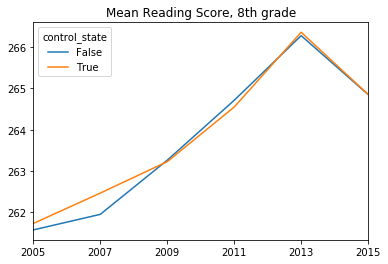

In [204]:
a.plot()
plt.title("Mean Reading Score, 8th grade")

In [2]:
# ax = plt.gca()

# a.plot(kind='line',y='False',ax=ax)
# a.plot(kind='line',y='True', color='red', ax=ax)

# plt.show()

In [221]:
def model(p):
    df = pd.read_csv(p)[['2005',
                                                '2007',
                                                '2009',
                                                '2011',
                                                '2013',
                                                '2015',
                                                '2017',
                                                '2019',
                                                'Unnamed: 0']]
    df = df.rename(columns = {'Unnamed: 0' : 'State'})
    df['control_state'] = df['State'].isin(control_states)
    df = df.set_index(['State', 'control_state'])
    df = df.stack().reset_index().rename(columns = {'level_2': 'Year', 0: 'score'})
    df['t'] = df['Year'].isin(['2017', '2019'])
#     df['t'] = df['Year'].isin(['2019'])
    df['interaction'] = df['t'] * df['control_state']
    model = smf.ols(formula = "score ~ control_state + t + interaction", data = df).fit()
    print(model.summary())


In [229]:
print("10th percentile")
model('./scoredata/p9_reading.csv')

10th percentile
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     10.44
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.26e-06
Time:                        17:40:38   Log-Likelihood:                -1275.1
No. Observations:                 408   AIC:                             2558.
Df Residuals:                     404   BIC:                             2574.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept     

In [217]:
model('./scoredata/p5_reading.csv')

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3052
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.822
Time:                        17:06:08   Log-Likelihood:                -1338.5
No. Observations:                 408   AIC:                             2685.
Df Residuals:                     404   BIC:                             2701.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               266.30

In [220]:
model('./scoredata/mean_reading.csv')

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.153
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.328
Time:                        17:07:22   Log-Likelihood:                -1332.5
No. Observations:                 408   AIC:                             2673.
Df Residuals:                     404   BIC:                             2689.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               264.00

In [233]:
model('./scoredata/p7_reading.csv')

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.196
Date:                Tue, 10 Nov 2020   Prob (F-statistic):            0.00610
Time:                        01:52:15   Log-Likelihood:                -1301.4
No. Observations:                 408   AIC:                             2611.
Df Residuals:                     404   BIC:                             2627.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               286.95

In [209]:
model('./scoredata/mean_reading.csv')

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.02022
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.996
Time:                        16:52:22   Log-Likelihood:                -1334.2
No. Observations:                 408   AIC:                             2676.
Df Residuals:                     404   BIC:                             2692.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               263.77

In [215]:
df = pd.read_csv('./scoredata/p5_reading.csv')[['2005',
                                                '2007',
                                                '2009',
                                                '2011',
                                                '2013',
                                                '2015',
                                                '2017',
                                                '2019',
                                                'Unnamed: 0']]
df = df.rename(columns = {'Unnamed: 0' : 'State'})

In [216]:
df['control_state'] = df['State'].isin(control_states)
df = df.set_index(['State', 'control_state'])
df = df.stack().reset_index().rename(columns = {'level_2': 'Year', 0: 'score'})
df['t'] = df['Year'].isin(['2017', '2019'])
df['interaction'] = df['t'] * df['control_state']

/usr/local/lib/python3.7/site-packages/pandas/core/computation/expressions.py:193: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [218]:
df.tail()

,State,control_state,Year,score,t,interaction
403,WY,True,2011,271.909998,False,False
404,WY,True,2013,272.281500,False,False
405,WY,True,2015,270.590999,False,False
406,WY,True,2017,271.431999,True,True
407,WY,True,2019,267.265999,True,True


In [213]:
X = df[['t', 'control_state']]
y = df['score']

In [219]:
model = smf.ols(formula = "score ~ control_state + t + interaction", data = df).fit()

In [220]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3523
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.788
Time:                        01:49:17   Log-Likelihood:                -1338.4
No. Observations:                 408   AIC:                             2685.
Df Residuals:                     404   BIC:                             2701.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               266.0103      0.428    621.295      0.000     265.169     266.852
control_state[T.True]    -0.0802      0.848     -0.095      0.925      -1.747       1.587
t[T.True]                 0.6492      0.856      0.758      0.449      -1.034       2.333
interaction[T.True]       0.3672      1.696      0.216      0.829      -2.967       3.701
==============================================================================
Omnibus:                       51.212   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.653
Skew:                          -0.842   Prob(JB):                     1.01e-16
Kurtosis:                       4.222   Cond. No.                         6.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""